# Visualization

In [1]:
import pandas as pd
import json

from matplotlib.ticker import MaxNLocator
from matplotlib import cm

import matplotlib.pyplot as plt
import numpy as np


In [2]:
with open('./compare_result_3_final.json') as json_file:
    result = json.load(json_file)

In [3]:
all_epochs = [int(x) for x in result.keys()]
max_epoch = max(all_epochs)
middle_epoch = sorted(all_epochs)[(len(all_epochs) + 1) // 2]

In [4]:
result['1']['RandomPlayer']

[{'board': [[0, 0, 0, 1, 0, -1, 0, -1, 0, 0, 0],
   [0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0],
   [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
   [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
   [0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0],
   [0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0],
   [0, 0, 1, 1, 1, -1, -1, -1, 0, 0, 0],
   [0, 0, 1, 0, 0, 0, -1, 0, -1, 0, 0],
   [0, 1, 1, 1, -1, -1, -1, -1, -1, 0, 0],
   [0, 1, 0, 1, 0, -1, 0, -1, 0, 0, 0],
   [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
   [1, 0, 0, 0, 1, 0, -1, 0, 1, 0, 0],
   [0, 0, 0, 0, -1, -1, -1, 1, 1, 0, 0],
   [0, 0, 0, 0, 0, -1, 0, 1, 0, 1, 0],
   [0, 0, 0, -1, -1, -1, -1, -1, 0, 0, 0],
   [0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0],
   [0, 0, -1, -1, 0, -1, -1, 0, 0, 0, 0]],
  'result': 1,
  'starter': True},
 {'board': [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
   [0, 0, 0, 0, -1, 0, 0, 1, 0, -1, 0],
   [0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0],
   [-1, 0, -1, 0, -1, 0, 1, 0, -1, 0, 0],
   [0, 0, 0, -1, 0, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
   [0, 0, 1, 1, 1, 1, 1, 1, 

## Versus Agents

In [5]:
df = pd.DataFrame({
    'epoch': [int(x) for x in result.keys()],
    'RandomPlayer': [
        [
            g['result']
            for g in result[e]['RandomPlayer']
        ]
        for e in result.keys()
    ],
    'SettlementFirstPlayer': [
        [
            g['result']
            for g in result[e]['SettlementFirstPlayer']
        ]
        for e in result.keys()
    ],
    'CustomRLPlayer': [
        [
            g['result']
            for g in result[e]['CustomRLPlayer']
        ]
        for e in result.keys()
    ],
})
df

,epoch,RandomPlayer,SettlementFirstPlayer,CustomRLPlayer
0,1,"[1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -...","[1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,2,"[1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1...","[-1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1,...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


### Not lost

In [6]:
def not_lost(x):
    return len([y for y in x if y >= -0.5])

df['Random agent'] = df['RandomPlayer'].apply(not_lost)
df['SettlementFirst agent'] = df['SettlementFirstPlayer'].apply(not_lost)
df['CustomRL agent'] = df['CustomRLPlayer'].apply(not_lost)
df

,epoch,RandomPlayer,SettlementFirstPlayer,CustomRLPlayer,Random agent,SettlementFirst agent,CustomRL agent
0,1,"[1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -...","[1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",87,26,0
1,2,"[1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1...","[-1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",92,40,0
2,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1,...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",95,44,0


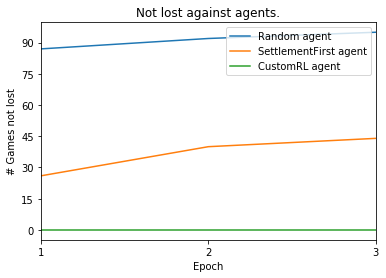

In [7]:
ax = df.plot(kind='line',x='epoch', y=['Random agent', 'SettlementFirst agent', 'CustomRL agent'], title='Not lost against agents.')
_ = ax.set_xlabel('Epoch')
_ = ax.set_ylabel('# Games not lost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('./not_lost.svg', format='svg')

# Won

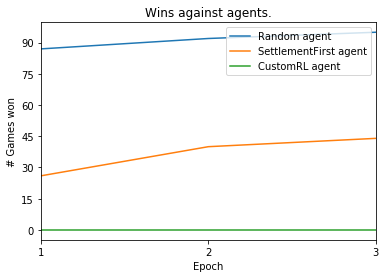

In [9]:
def won(x):
    return len([y for y in x if y == 1])

df['Random agent'] = df['RandomPlayer'].apply(not_lost)
df['SettlementFirst agent'] = df['SettlementFirstPlayer'].apply(not_lost)
df['CustomRL agent'] = df['CustomRLPlayer'].apply(not_lost)
df

ax = df.plot(kind='line',x='epoch', y=['Random agent', 'SettlementFirst agent', 'CustomRL agent'], title='Wins against agents.')
_ = ax.set_xlabel('Epoch')
_ = ax.set_ylabel('# Games won')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('./won.svg', format='svg')

## Board Heat

In [10]:
BOARD_MASK = np.array([
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    ])

D:\Files\Documents\Anaconda\envs\aml\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


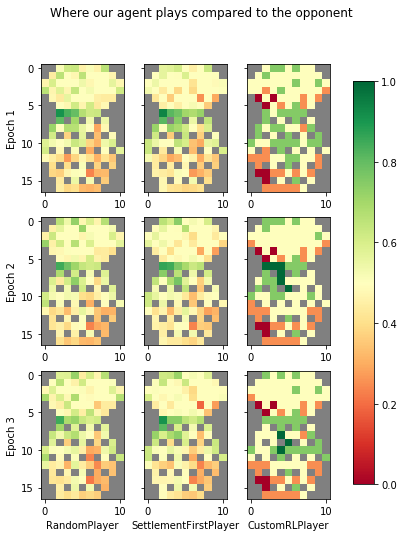

In [11]:
f, axes = plt.subplots(3, 3, sharey=True, figsize=(6, 8))
cmap = viridis = cm.get_cmap('RdYlGn')
cmap.set_bad(color='grey')

epochs = [1, (max_epoch + 1) // 2, max_epoch]
opponents = ['RandomPlayer', 'SettlementFirstPlayer', 'CustomRLPlayer']

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.mean(np.array([
            g['board']
            for g in result[str(epoch)][opponent]
        ]), axis=0)
        a += 1
        a /= 2
        im = ax.imshow(a / BOARD_MASK, cmap=cmap, interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Where our agent plays compared to the opponent")

f.savefig('./board_heat.svg', format='svg')

## Alpha Zero Heat

D:\Files\Documents\Anaconda\envs\aml\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


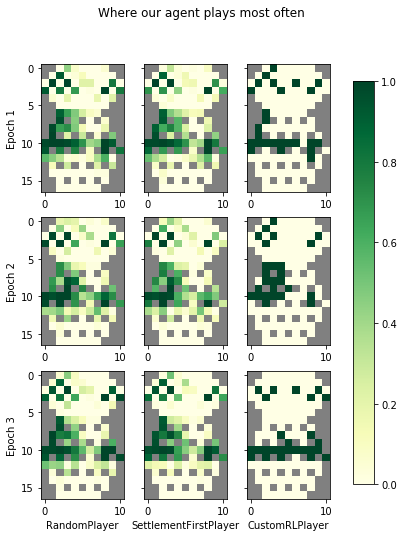

In [15]:
f, axes = plt.subplots(3, 3, sharey=True, figsize=(6, 8))

cmap = viridis = cm.get_cmap('YlGn')
cmap.set_bad(color='grey')

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.array([
            g['board']
            for g in result[str(epoch)][opponent]
        ])
        a *= a > 0
        a = np.mean(a, axis=0)
        im = ax.imshow(a / BOARD_MASK, cmap='YlGn', interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
_ = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Where our agent plays most often")

f.savefig('./az_heat.svg', format='svg')